In [1]:
import pandas as pd
import keras

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_ids = df_train.copy()
del df_ids['label']

matrix_ids = df_ids.as_matrix()

C:\Users\jpaladini\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [5]:
df_results = df_train['label']

matrix_results = df_results.as_matrix()

C:\Users\jpaladini\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
matrix_ids = matrix_ids.reshape(matrix_ids.shape[0], 28, 28)

In [9]:
matrix_ids = matrix_ids.astype(np.float32)

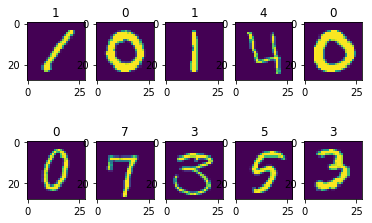

In [10]:
for i in range(10):
    
    plt.subplot(2, 5, i + 1)
    
    plt.imshow(matrix_ids[i])
    plt.title(matrix_results[i])

In [11]:
mean_ids = matrix_ids.mean().astype(np.float32)
std_ids = matrix_ids.std().astype(np.float32)

In [12]:
def standard(x):
    
    return (x - mean_ids) / std_ids

In [13]:
matrix_ids.shape

(42000, 28, 28)

In [14]:
import tensorflow

In [15]:
model = keras.Sequential([keras.layers.Lambda(standard, input_shape=(28, 28))
                         ,keras.layers.Flatten()
                         ,keras.layers.Dense(128, activation=tensorflow.nn.relu)
                         ,keras.layers.Dense(10, activation=tensorflow.nn.softmax)])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss')
            ,keras.callbacks.ModelCheckpoint(filepath='best_model.hfd5'
                                             , monitor='val_loss', save_best_only=True)]

In [17]:
adam = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=adam
             , loss="sparse_categorical_crossentropy"
             , metrics=["accuracy"])

In [18]:
history = model.fit(matrix_ids, matrix_results ,epochs=10, validation_split=0.10,  callbacks=callbacks)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 6s 167us/step - loss: 0.2590 - accuracy: 0.9198 - val_loss: 0.1519 - val_accuracy: 0.9517
Epoch 2/10
37800/37800 [==============================] - 6s 156us/step - loss: 0.1165 - accuracy: 0.9639 - val_loss: 0.1175 - val_accuracy: 0.9612
Epoch 3/10
37800/37800 [==============================] - 6s 158us/step - loss: 0.0800 - accuracy: 0.9757 - val_loss: 0.1075 - val_accuracy: 0.9683
Epoch 4/10
37800/37800 [==============================] - 6s 171us/step - loss: 0.0602 - accuracy: 0.9810 - val_loss: 0.0969 - val_accuracy: 0.9690
Epoch 5/10
37800/37800 [==============================] - 6s 170us/step - loss: 0.0457 - accuracy: 0.9850 - val_loss: 0.1051 - val_accuracy: 0.9693


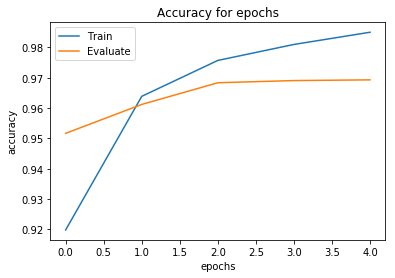

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Evaluate'])

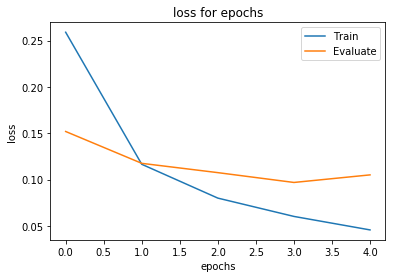

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss for epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Evaluate'])

In [21]:
df_test = pd.read_csv('test.csv')

In [22]:
matrix_test_ids = df_test.as_matrix()

C:\Users\jpaladini\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
matrix_test_ids.shape

(28000, 784)

In [24]:
matrix_test_ids = matrix_test_ids.reshape(matrix_test_ids.shape[0], 28, 28)

In [25]:
matrix_test_ids = matrix_test_ids.astype(np.float32)

In [26]:
predict_test = model.predict(matrix_test_ids)

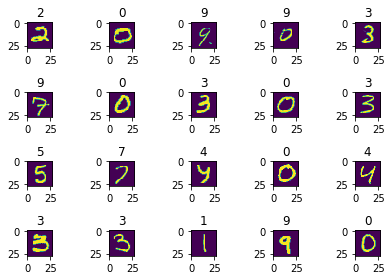

In [27]:
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.tight_layout()
    
    plt.title(np.argmax(predict_test[i]))
    plt.imshow(matrix_test_ids[i])

In [28]:
recognizer_number = []
img_ids = []

for i in range(len(predict_test)):
    
    result = np.argmax(predict_test[i])
    recognizer_number.append(result)
    
    ids = i + 1
    img_ids.append(ids)

In [29]:
df_predict = pd.DataFrame(list(zip(img_ids, recognizer_number)))
df_predict.columns = ['ImageId', 'Label']

In [30]:
df_predict.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [31]:
df_predict.to_csv('Submission.csv', index=False)